In this notebook I want to examine distributions of the orientation and magnitude  vector fields. 

To calculate helicity I need a momentum field and it's circulation.
To caclulate the reference fields for relative helicity I need a reference momentum and circulation.
First I solve a Laplace bounday problem for a reference scalar momentum. Teh gradient gives me the reference circulation. Then I invert a curl to find the reference momentum.

I will compare:

1. Analytic magnetic vector potential from a wire along the y axis and the vector potential obtained from curl inversion of the analytic mangetic field. 
2. Analytic magnetic field from a wire along the y axis and the field obtained from the gradient of Lapalce solution with the same boundary conditions.

In [272]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

In [273]:
import numpy as np
import xi_squared
import read_rectilinear_vtk as read_rvtk
reload(read_rvtk)
import sys
sys.path.append('../../vector_calculus')
sys.path.append('../../invert_curl/')
sys.path.append('../../laplace_solver/')
import invert_curl as inv_curl
reload(inv_curl)
import laplace_solver as l_solve
import vector_calculus as vc
reload(vc)
import xi_squared as xi2
reload(xi2)
import vector_taylor as vt
reload(vt)
import itertools

# Compare A and A from curl inversion

## Uniform B Field

In [241]:
mesh, B_x, B_y, B_z = vc.constant_B_field(limits=(-5, 5, -5, 5, -5, 5),
                                                  direction='y')

In [242]:
A_from_curl_inversion = inv_curl.fourier_inverse_curl(B_x, B_y, B_z, 
                                                      mesh[0], mesh[1], mesh[2])
B_from_curl_inversion = vc.curl(A_from_curl_inversion, mesh=mesh)

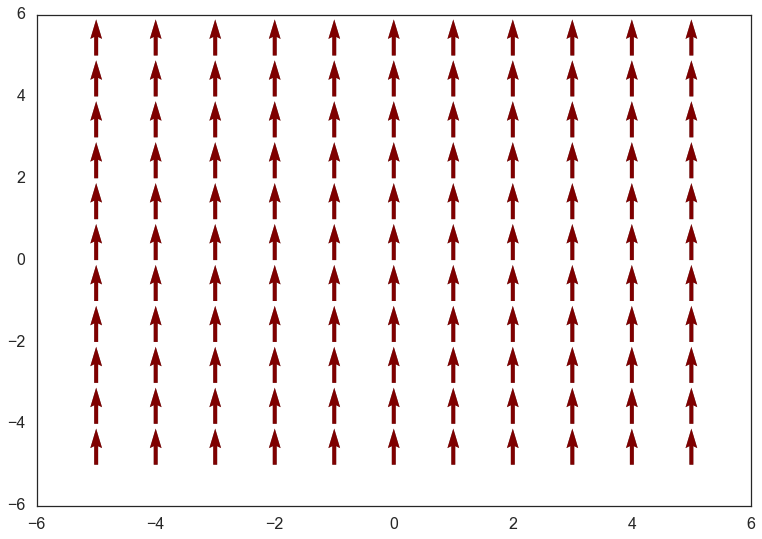

In [243]:
plt.quiver(mesh[0][0, :, :], mesh[2][0, :, :], 
           B_x[0, :, :], B_y[0, :, :])
plt.quiver(mesh[0][0, :, :], mesh[2][0, :, :], 
           B_from_curl_inversion[0][0, :, :],
           B_from_curl_inversion[1][0, :, :],
           color='red', alpha=0.5)

Reference std: 1.0
1.0 1.0


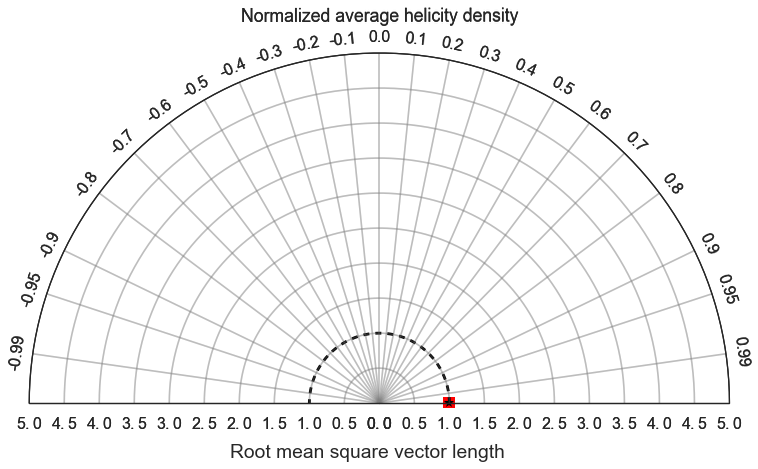

In [244]:
vt.calc_and_plot(np.asarray([B_x, B_y, B_z]),  
                 (np.asarray(B_from_curl_inversion),),
                 std_multiplier=5)

## B Field around a current-carrying wire

In [300]:
mesh, A_x, A_y, A_z, B_x, B_y, B_z = vc.field_from_wire(limits=(-5, 5, -5, 5, -5, 5),
                                                        wire_along_axis='y')

In [313]:
B_from_ana_curl_inversion = vc.curl([A_x, A_y, A_z], mesh=mesh)

In [316]:
B_from_ana_curl_inversion[2][5, :, :]

array([[ 0.01579222,  0.01972218,  0.02446885,  0.02956809,  0.03381113,
         0.0355144 ,  0.03381113,  0.02956809,  0.02446885,  0.01972218,
         0.01579222],
       [ 0.01534502,  0.01968334,  0.02530519,  0.03192435,  0.03801859,
         0.04065021,  0.03801859,  0.03192435,  0.02530519,  0.01968334,
         0.01534502],
       [ 0.01377789,  0.01870085,  0.02601891,  0.03645805,  0.04869248,
         0.0551589 ,  0.04869248,  0.03645805,  0.02601891,  0.01870085,
         0.01377789],
       [ 0.01067388,  0.01534502,  0.02338729,  0.03801859,  0.0640375 ,
         0.08742479,  0.0640375 ,  0.03801859,  0.02338729,  0.01534502,
         0.01067388],
       [ 0.00590544,  0.0088786 ,  0.0146313 ,  0.02757945,  0.0640375 ,
         0.09494764,  0.0640375 ,  0.02757945,  0.0146313 ,  0.0088786 ,
         0.00590544],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.   

In [301]:
A_from_curl_inversion = inv_curl.fourier_inverse_curl(B_x, B_y, B_z, 
                                                      mesh[0], mesh[1], mesh[2])
B_from_curl_inversion = vc.curl(A_from_curl_inversion, mesh=mesh)

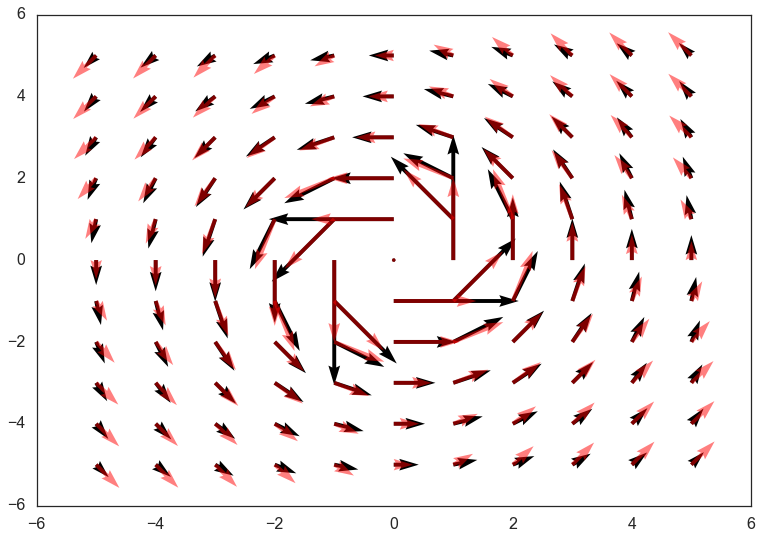

In [303]:
plt.quiver(mesh[0][0, :, :], mesh[2][0, :, :], 
           B_x[0, :, :], B_z[0, :, :])
plt.quiver(mesh[0][0, :, :], mesh[2][0, :, :], 
           B_from_curl_inversion[0][5, :, :],
           B_from_curl_inversion[2][5, :, :],
           color='red', alpha=0.5)

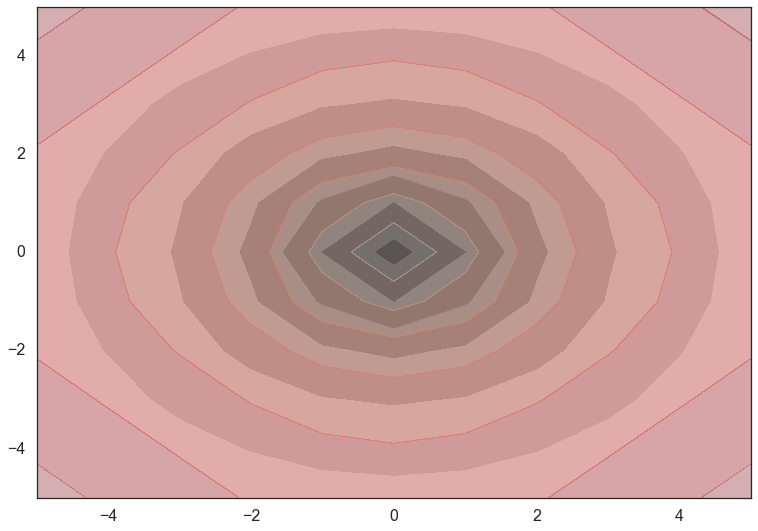

In [248]:
plt.contourf(mesh[0][0, :, :], mesh[2][0, :, :], 
             A_y[0, :, :])
plt.contourf(mesh[0][0, :, :], mesh[2][0, :, :], 
             A_from_curl_inversion[1][0, :, :], cmap='Reds', alpha=0.3)

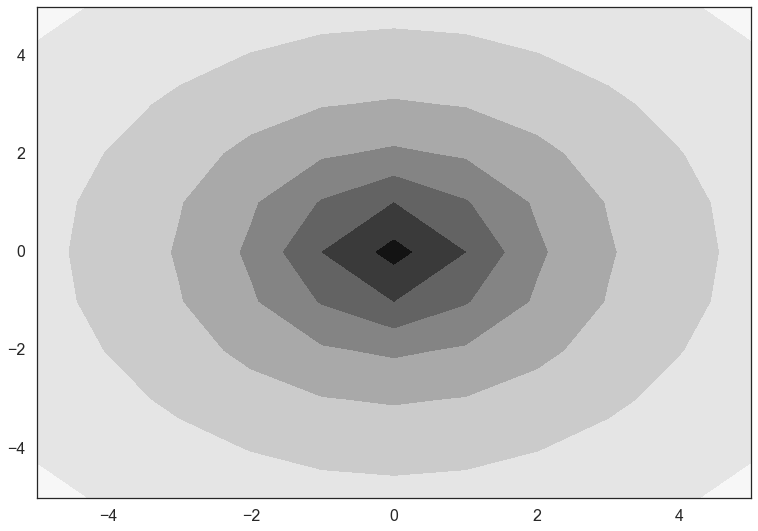

In [249]:
plt.contourf(mesh[0][0, :, :], mesh[2][0, :, :], 
             A_y[0, :, :])
#plt.contourf(mesh[0][0, :, :], mesh[2][0, :, :], 
#             A_from_curl_inversion[1][0, :, :], cmap='Reds', alpha=0.3)

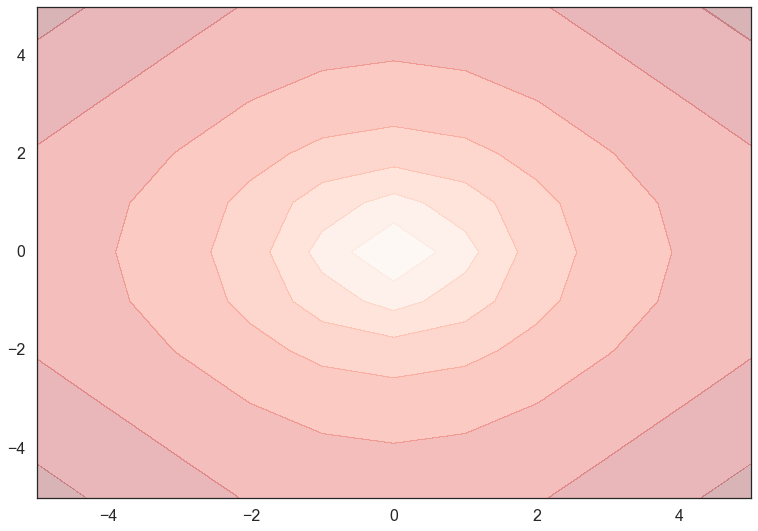

In [250]:
plt.contourf(mesh[0][0, :, :], mesh[2][0, :, :], 
             A_from_curl_inversion[1][0, :, :], cmap='Reds', alpha=0.3)

# Distributions of orientation and magnitude

In [309]:
np.asarray(B_from_curl_inversion)[:, 5, :, :]

array([[[  1.94729138e-01,   1.92748164e-01,   1.85258099e-01,
           1.54931431e-01,   9.10262830e-02,   1.11460123e-16,
          -9.10262830e-02,  -1.54931431e-01,  -1.85258099e-01,
          -1.92748164e-01,  -1.94729138e-01],
        [  1.89358334e-01,   1.86457623e-01,   1.77771071e-01,
           1.46327986e-01,   8.34494644e-02,   4.83144894e-19,
          -8.34494644e-02,  -1.46327986e-01,  -1.77771071e-01,
          -1.86457623e-01,  -1.89358334e-01],
        [  1.82148056e-01,   1.86679257e-01,   1.92928907e-01,
           1.73333400e-01,   1.09996392e-01,   4.42949865e-19,
          -1.09996392e-01,  -1.73333400e-01,  -1.92928907e-01,
          -1.86679257e-01,  -1.82148056e-01],
        [  1.74384278e-01,   1.94128432e-01,   2.34769488e-01,
           2.45648853e-01,   1.65861655e-01,   2.21811098e-16,
          -1.65861655e-01,  -2.45648853e-01,  -2.34769488e-01,
          -1.94128432e-01,  -1.74384278e-01],
        [  1.64941166e-01,   2.05081226e-01,   2.92249774e-0

In [305]:
xi2.calc_and_plot_dists([B_x[5, :, :], B_y[5, :, :], B_z[5, :, :]], np.asarray(B_from_curl_inversion)[:, 5, :, :], 
                        units=r'$T$', field1_title=r'Reference Field', 
                        field2_title=r'circulation of inverted curl ')

IndexError: too many indices for array

# Taylor plot

Reference std: 0.0541397734659
0.966191683342 0.326140844872


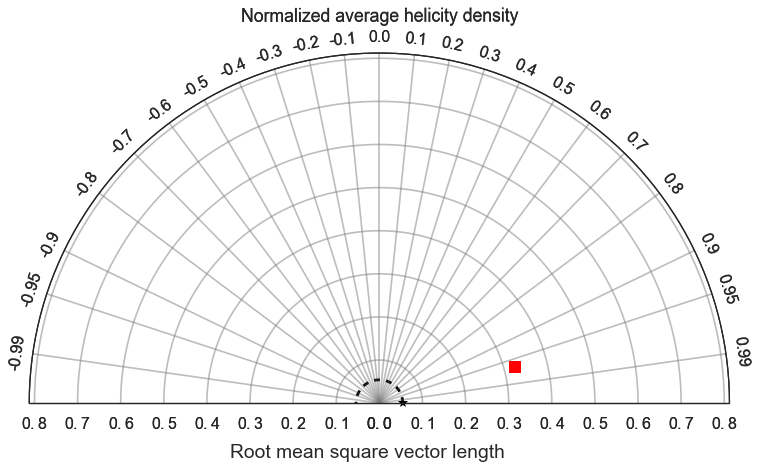

In [252]:
vt.calc_and_plot(np.asarray([B_x, B_y, B_z]),  
                 (np.asarray(B_from_curl_inversion),),
                 std_multiplier=15)

# How does it change with increasing resolution

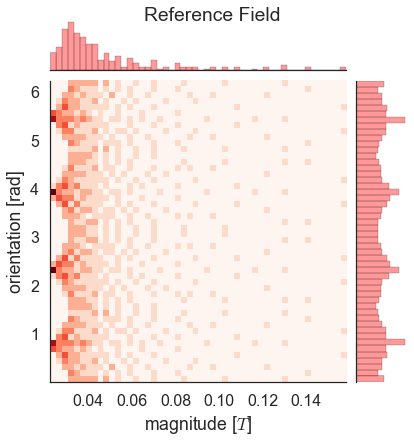

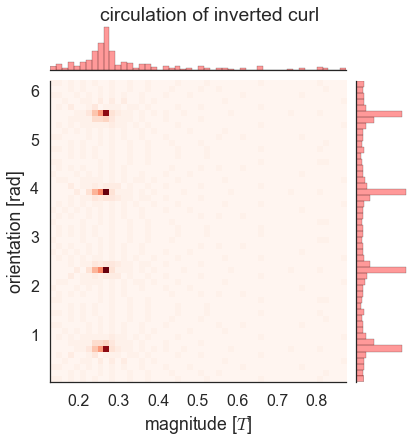

Xi^2 = 18100.98051910.2


In [253]:
mesh, A_x, A_y, A_z, B_x, B_y, B_z = vc.field_from_wire(limits=(-5, 5, -5, 5, -5, 5),
                                                        wire_along_axis='y',
                                                        points=[30, 30, 30])
A_from_curl_inversion = inv_curl.fourier_inverse_curl(B_x, B_y, B_z, 
                                                      mesh[0], mesh[1], mesh[2])
B_from_curl_inversion = vc.curl(A_from_curl_inversion, mesh=mesh)

xi2.calc_and_plot_dists([B_x, B_y, B_z], B_from_curl_inversion, 
                        units=r'$T$', field1_title=r'Reference Field', 
                        field2_title=r'circulation of inverted curl ')

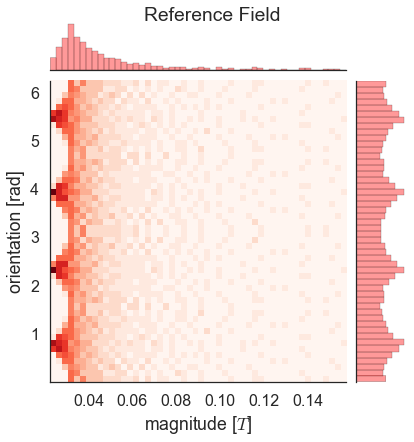

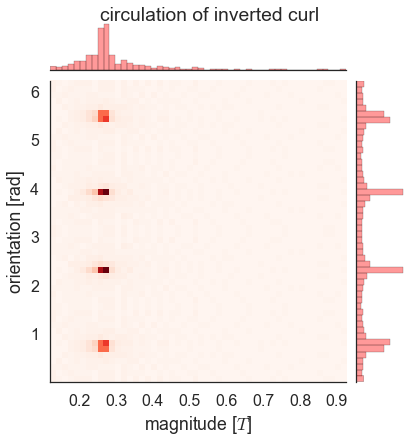

Xi^2 = 58916.83782910.2


In [254]:
mesh, A_x, A_y, A_z, B_x, B_y, B_z = vc.field_from_wire(limits=(-5, 5, -5, 5, -5, 5),
                                                        wire_along_axis='y',
                                                        points=[50, 50, 50])
A_from_curl_inversion = inv_curl.fourier_inverse_curl(B_x, B_y, B_z, 
                                                      mesh[0], mesh[1], mesh[2])
B_from_curl_inversion = vc.curl(A_from_curl_inversion, mesh=mesh)

xi2.calc_and_plot_dists([B_x, B_y, B_z], B_from_curl_inversion, 
                        units=r'$T$', field1_title=r'Reference Field', 
                        field2_title=r'circulation of inverted curl ')

Reference std: 0.0559182213642
(3, 10, 10, 10)
(3, 10, 10, 10)
0.912111192787 0.308569247257
(3, 10, 10, 10)
(3, 10, 10, 10)
0.971326887261 0.34180755564
(3, 10, 10, 10)
(3, 10, 10, 10)
0.986534052871 0.360837247036


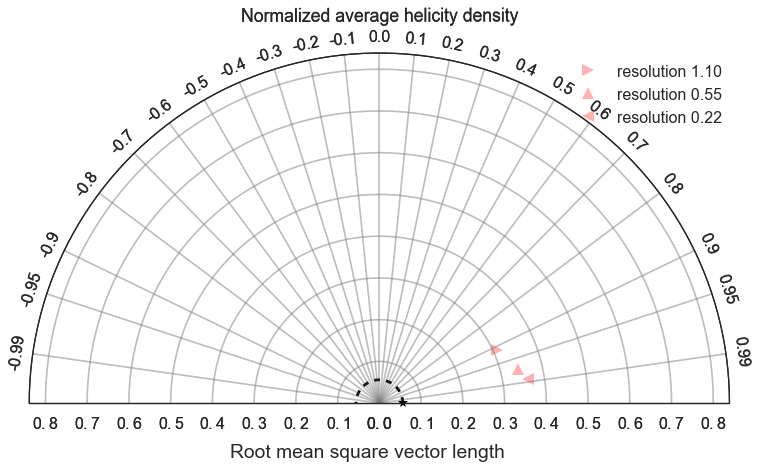

In [274]:
point_numbers = [10, 20, 50]
fields = []
labels = ['resolution %1.2f' % (11./point_numbers[0]), 
          'resolution %1.2f' % (11./point_numbers[1]), 
          'resolution %1.2f' % (11./point_numbers[2])]
for points_number in  point_numbers:
    mesh, A_x, A_y, A_z, B_x, B_y, B_z = vc.field_from_wire(limits=(-5, 5, -5, 5, -5, 5),
                                                            wire_along_axis='y', 
                                                            points=(points_number, points_number, points_number))
    A_from_curl_inversion = inv_curl.fourier_inverse_curl(B_x, B_y, B_z, 
                                                          mesh[0], mesh[1], mesh[2])
    B_from_curl_inversion = vc.curl(A_from_curl_inversion, mesh=mesh)
    fields.append(np.array(B_from_curl_inversion))
    
fields[1] = fields[1][:, ::2, ::2, ::2]
fields[2] = fields[2][:, ::5, ::5, ::5]
ref_field = np.asarray([B_x, B_y, B_z])[:, ::5, ::5, ::5]

vt.calc_and_plot(ref_field,  
                 fields,
                 labels=labels,
                 std_multiplier=15, markers=[">", "^", "<"])

# Now let's look only at a corner, current carrying wire is at 0,0, radius 1

In [275]:
mesh, A_x, A_y, A_z, B_x, B_y, B_z = vc.field_from_wire(limits=(0, 10, 0, 10, 0, 10),
                                                        wire_along_axis='y')

In [276]:
A_from_curl_inversion = inv_curl.fourier_inverse_curl(B_x, B_y, B_z, 
                                                      mesh[0], mesh[1], mesh[2], method='fourier')
B_from_curl_inversion = vc.curl(A_from_curl_inversion, mesh=mesh)

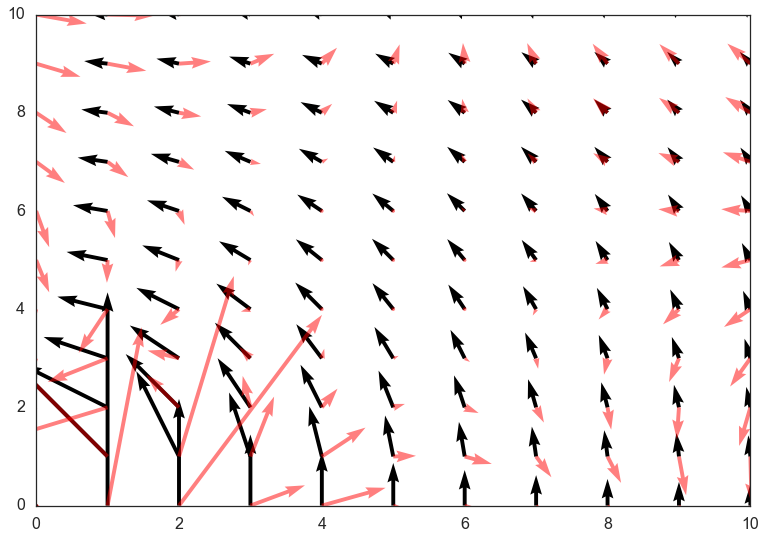

In [277]:
plt.quiver(mesh[0][0, :, :], mesh[2][0, :, :], 
           B_x[0, :, :], B_z[0, :, :])
plt.quiver(mesh[0][0, :, :], mesh[2][0, :, :], 
           B_from_curl_inversion[0][0, :, :],
           B_from_curl_inversion[2][0, :, :],
           color='red', alpha=0.5)

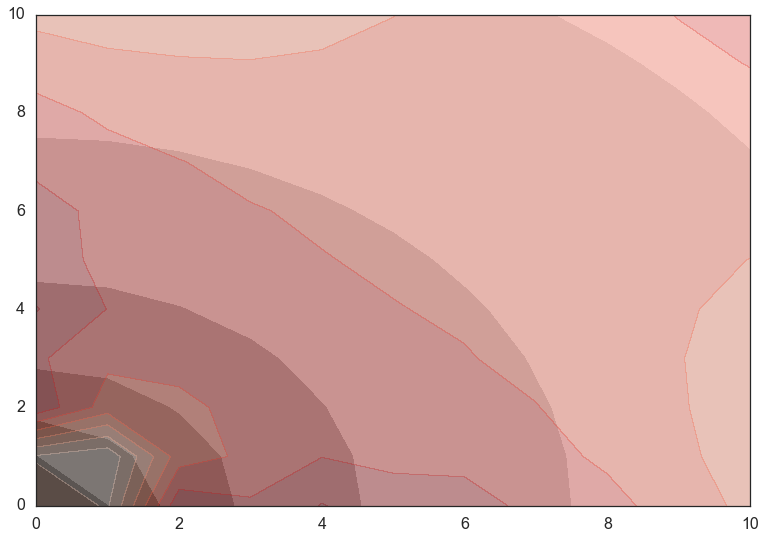

In [278]:
plt.contourf(mesh[0][0, :, :], mesh[2][0, :, :], 
             A_y[0, :, :])
plt.contourf(mesh[0][0, :, :], mesh[2][0, :, :], 
             A_from_curl_inversion[1][0, :, :], cmap='Reds', alpha=0.3)

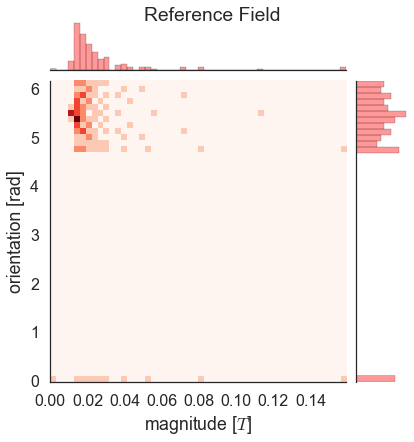

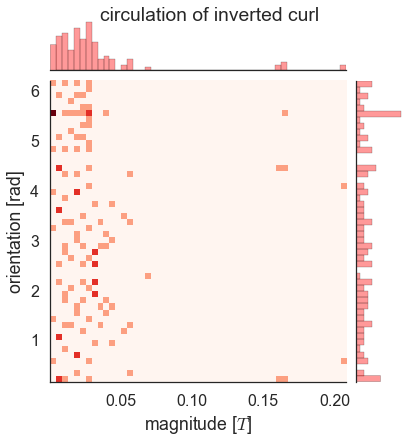

Xi^2 = 1078.73333310.2


In [279]:
xi2.calc_and_plot_dists([B_x, B_y, B_z], B_from_curl_inversion, 
                        units=r'$T$', field1_title=r'Reference Field', 
                        field2_title=r'circulation of inverted curl ')

Reference std: 0.0356273466962
(3, 11, 11, 11)
(3, 11, 11, 11)
0.533392152982 0.0498249696968


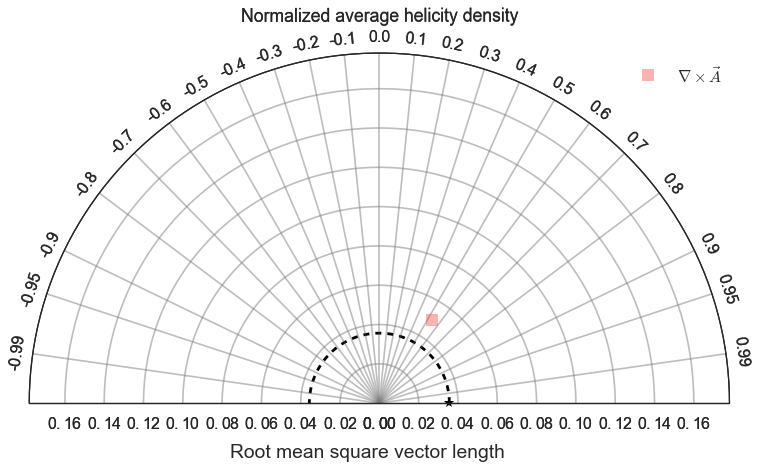

In [280]:
vt.calc_and_plot(np.asarray([B_x, B_y, B_z]),  
                 (np.asarray(B_from_curl_inversion),),
                 std_multiplier=5, labels=[r'$\nabla \times \vec{A}$'])

Reference std: 0.0378736949947
(3, 10, 10, 10)
(3, 10, 10, 10)
0.511463486641 0.0505384911323
(3, 10, 10, 10)
(3, 10, 10, 10)
0.532761580529 0.0708375872648
(3, 10, 10, 10)
(3, 10, 10, 10)
0.481519003766 0.0934996395292


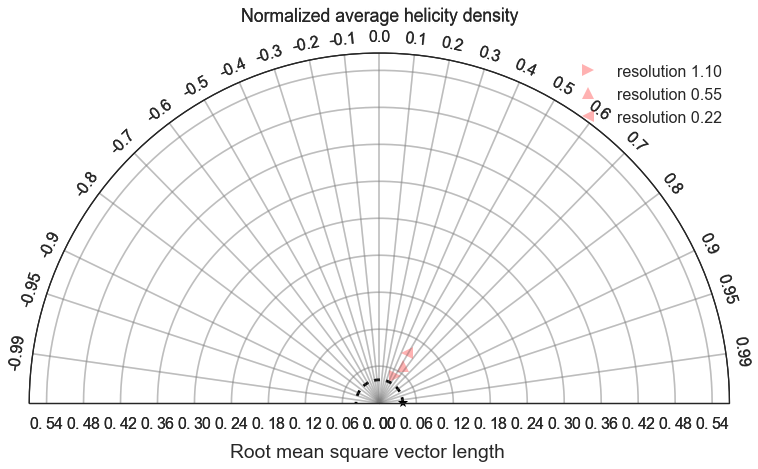

In [283]:
point_numbers = [10, 20, 50]
fields = []
labels = ['resolution %1.2f' % (11./point_numbers[0]), 
          'resolution %1.2f' % (11./point_numbers[1]), 
          'resolution %1.2f' % (11./point_numbers[2])]
for points_number in  point_numbers:
    mesh, A_x, A_y, A_z, B_x, B_y, B_z = vc.field_from_wire(limits=(0, 10, 0, 10, 0, 10),
                                                            wire_along_axis='y', 
                                                            points=(points_number,
                                                                    points_number,
                                                                    points_number))
    A_from_curl_inversion = inv_curl.fourier_inverse_curl(B_x, B_y, B_z, 
                                                          mesh[0], mesh[1], mesh[2])
    B_from_curl_inversion = vc.curl(A_from_curl_inversion, mesh=mesh)
    fields.append(np.array(B_from_curl_inversion))
    
fields[1] = fields[1][:, ::2, ::2, ::2]
fields[2] = fields[2][:, ::5, ::5, ::5]
ref_field = np.asarray([B_x, B_y, B_z])[:, ::5, ::5, ::5]

vt.calc_and_plot(ref_field,  
                 fields,
                 labels=labels,
                 std_multiplier=15, markers=[">", "^", "<"])

## To 0th order RSX is a rotating rod of current 
## Solutions for a rotating rod in and out of the space

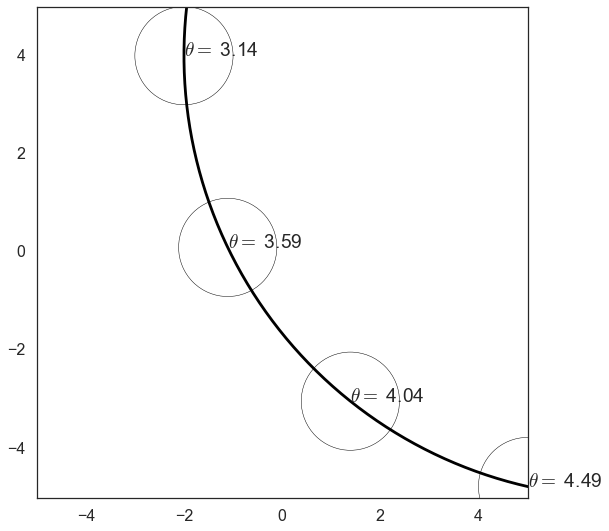

In [284]:
xlims = (-5, 5)
ylims = (-5, 5)
angles = np.linspace(0, 2.*np.pi, 250)
rot_center = [7., 4.]
radius = 9
x_wire_center = np.cos(angles)*radius + rot_center[0]
y_wire_center = np.sin(angles)*radius + rot_center[1]

fig, ax = plt.subplots() 
ax.plot(x_wire_center, y_wire_center, c='black')

angles = np.linspace(0, 2.*np.pi, 15)
rot_center = [7., 4.]
radius = 9
x_wire_center = np.cos(angles)*radius + rot_center[0]
y_wire_center = np.sin(angles)*radius + rot_center[1]

for angle in angles:
    x_wire_center = np.cos(angle)*radius + rot_center[0]
    y_wire_center = np.sin(angle)*radius + rot_center[1]
    circle = plt.Circle((x_wire_center, y_wire_center), 1., fill=None)
    ax.add_artist(circle)
    if (xlims[0] < x_wire_center < xlims[1] and

        
        ylims[0] < y_wire_center < ylims[1]):
        ax.text(x_wire_center, y_wire_center, r'$\theta = $ %1.2f' % angle)
    

ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(ylims[0], ylims[1])

ax.set_aspect('equal')

Reference std: 0.0100180070146
(3, 11, 11, 11)
(3, 11, 11, 11)
0.760267504658 0.0178429317466


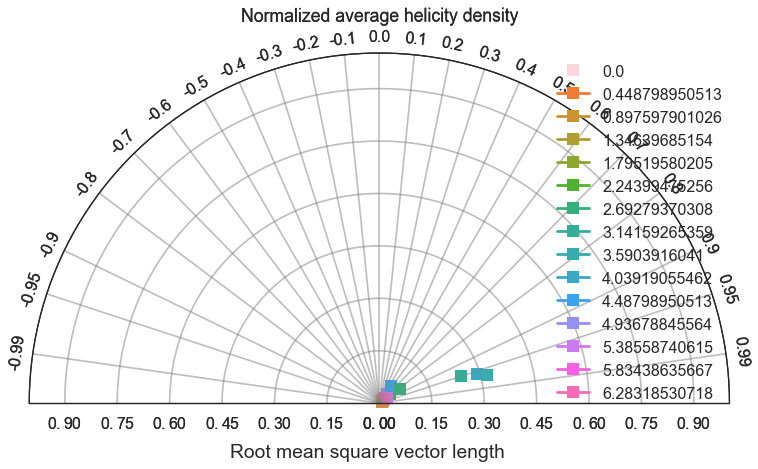

In [285]:
rmsls = []
similarities = [] 
fields = []
for angle in angles:
    x_wire_center = np.cos(angle)*radius + rot_center[0]
    y_wire_center = np.sin(angle)*radius + rot_center[1]
    mesh, A_x, A_y, A_z, B_x, B_y, B_z = vc.field_from_wire(limits=(-5, 5, -5, 5, -5, 5),
                                                            wire_along_axis='y', 
                                                            center=[x_wire_center, 
                                                                    y_wire_center],
                                                            a=1)
    A_from_curl_inversion = inv_curl.fourier_inverse_curl(B_x, B_y, B_z, 
                                                          mesh[0], mesh[1], mesh[2])
    B_from_curl_inversion = vc.curl(A_from_curl_inversion, mesh=mesh)
    fields.append(np.array(B_from_curl_inversion))
    rmsls.append(vt.root_mean_square_lenth(B_from_curl_inversion))
    similarities.append(vt.vector_simililarity_coefficient(np.array([B_x, B_y, B_z]),
                                                           B_from_curl_inversion))
palette = itertools.cycle(sns.color_palette("husl", 15))
labels = list(angles.astype(str))
diagram = vt.calc_and_plot(np.array([B_x, B_y, B_z]),
                           [np.array(fields[0]),], colors=[next(palette),], 
                           std_multiplier=100, labels=[angles[0],])
for i in range(1, len(rmsls)):
    diagram.add_sample(rmsls[i], similarities[i], 
                       marker='s', color=next(palette), label=labels[i])
diagram.ax.legend()

In [286]:
angles[8]

3.5903916041026207

Reference std: 0.0100180070146
(3, 11, 11, 11)
(3, 11, 11, 11)
0.760267504658 0.0178429317466


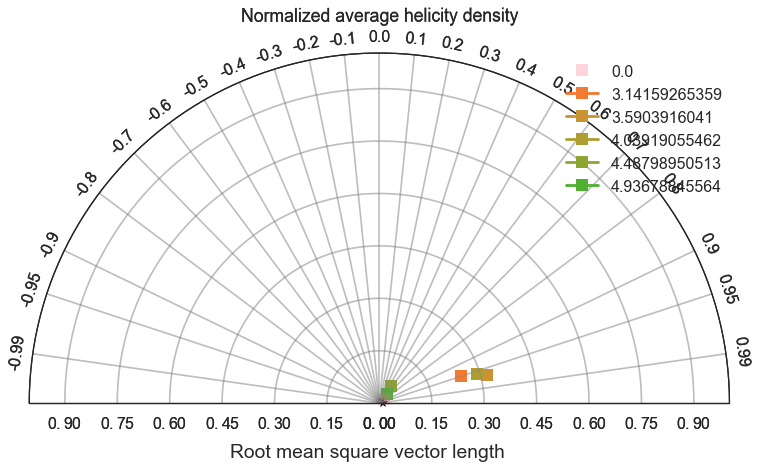

In [287]:
rmsls = []
similarities = [] 
fields = []
for angle in angles:
    x_wire_center = np.cos(angle)*radius + rot_center[0]
    y_wire_center = np.sin(angle)*radius + rot_center[1]
    mesh, A_x, A_y, A_z, B_x, B_y, B_z = vc.field_from_wire(limits=(-5, 5, -5, 5, -5, 5),
                                                            wire_along_axis='y', 
                                                            center=[x_wire_center, 
                                                                    y_wire_center],
                                                            a=1)
    A_from_curl_inversion = inv_curl.fourier_inverse_curl(B_x, B_y, B_z, 
                                                          mesh[0], mesh[1], mesh[2])
    B_from_curl_inversion = vc.curl(A_from_curl_inversion, mesh=mesh)
    fields.append(np.array(B_from_curl_inversion))
    rmsls.append(vt.root_mean_square_lenth(B_from_curl_inversion))
    similarities.append(vt.vector_simililarity_coefficient(np.array([B_x, B_y, B_z]),
                                                           B_from_curl_inversion))
palette = itertools.cycle(sns.color_palette("husl", 15))
labels = list(angles.astype(str))
diagram = vt.calc_and_plot(np.array([B_x, B_y, B_z]),
                           [np.array(fields[0]),], colors=[next(palette),], 
                           std_multiplier=100, labels=[angles[0],])
for i in range(7, 12):
    diagram.add_sample(rmsls[i], similarities[i], 
                       marker='s', color=next(palette), label=labels[i])
diagram.ax.legend()

# Can a discrete cosine transform handle the boundaries better?

The cosine transform basis function have a factor of $\pi$ in stead of $2 \pi$.
$\sum A_n cos(\pi k x)$
vs.
$\sum A_n cos(2 \pi k x) + B_n sin(2 \pi k x)$

In [295]:
mesh, A_x, A_y, A_z, B_x, B_y, B_z = vc.field_from_wire(limits=(3, 15, 3, 15, 3, 15),
                                                        wire_along_axis='y')

In [296]:
A_from_curl_inversion = inv_curl.fourier_inverse_curl(B_x, B_y, B_z, 
                                                      mesh[0], mesh[1], mesh[2], method='cosine')
B_from_curl_inversion = vc.curl(A_from_curl_inversion, mesh=mesh)

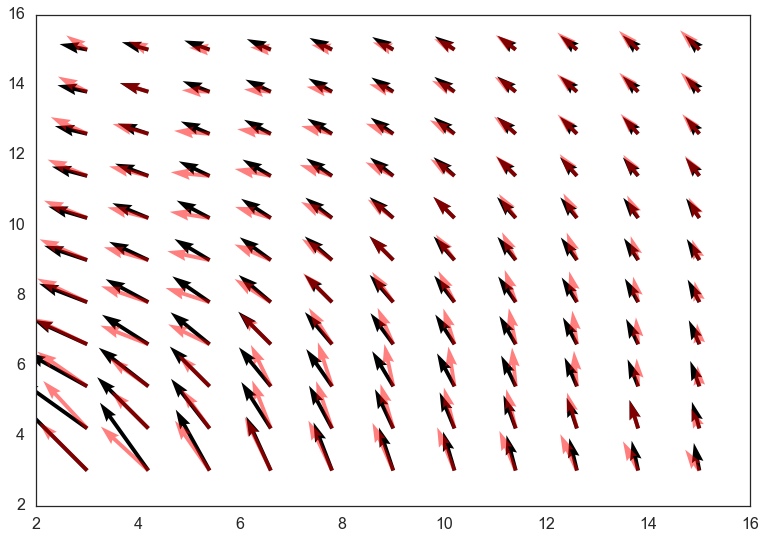

In [297]:
plt.quiver(mesh[0][0, :, :], mesh[2][0, :, :], 
           B_x[0, :, :], B_z[0, :, :])
plt.quiver(mesh[0][0, :, :], mesh[2][0, :, :], 
           B_from_curl_inversion[0][0, :, :],
           B_from_curl_inversion[2][0, :, :],
           color='red', alpha=0.5)

Reference std: 0.0143162549558
(3, 11, 11, 11)
(3, 11, 11, 11)
0.970511938467 0.0163249551547


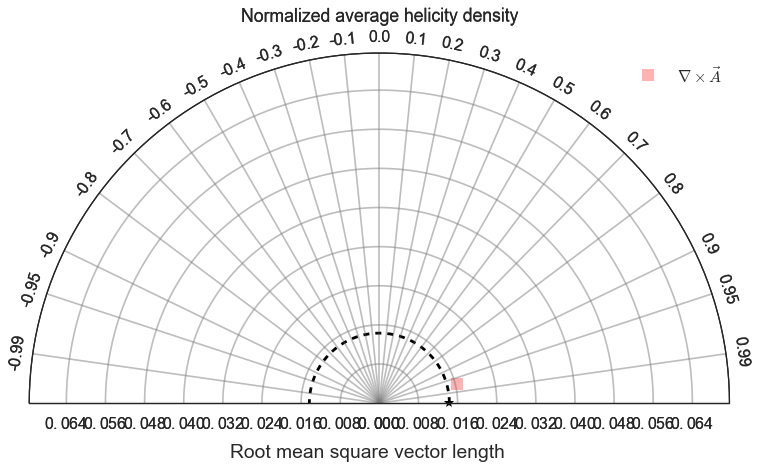

In [298]:
vt.calc_and_plot(np.asarray([B_x, B_y, B_z]),  
                 (np.asarray(B_from_curl_inversion),),
                 std_multiplier=5, labels=[r'$\nabla \times \vec{A}$'])

# Compare B and $\nabla \Phi$ of Lapace solver

In [86]:
mesh, A_x, A_y, A_z, B_x, B_y, B_z = vc.field_from_wire(limits=(3, 15, 3, 15, 3, 15),
                                                        wire_along_axis='y')

In [87]:
boundary = np.zeros(mesh[0].shape)
boundary[:, 0, :] = B_x[:, 0, :]
boundary[:, -1, :] = B_x[:, -1, :]
boundary[0, :, :] = B_y[0, :, :]
boundary[-1, :, :] = B_y[-1, :, :]
boundary[:, :, 0] = B_z[:, :, 0]
boundary[:, :, 0] = B_z[:, :, 0]
scalar_potential =  l_solve.laplace_3d_dct_fd(mesh, boundary)
B_from_laplace_scalar_potential = vc.gradient(scalar_potential)

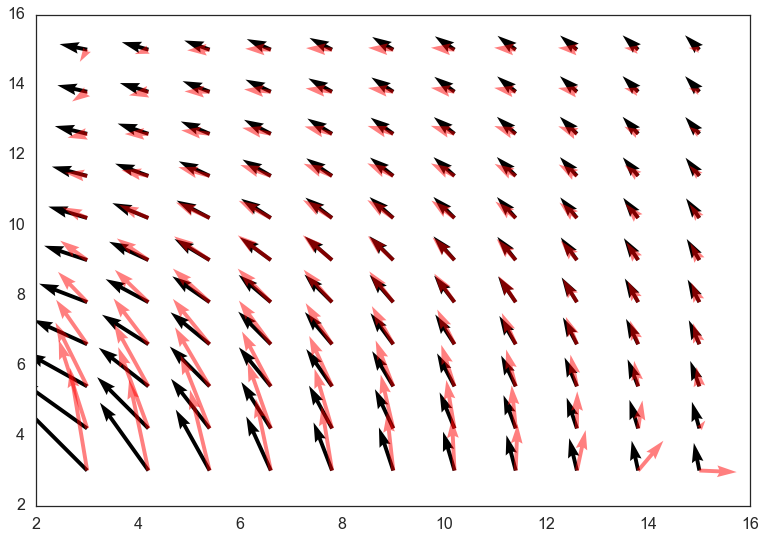

In [88]:
plt.quiver(mesh[0][0, :, :], mesh[2][0, :, :], 
           B_x[0, :, :], B_z[0, :, :])
plt.quiver(mesh[0][0, :, :], mesh[2][0, :, :], 
           B_from_laplace_scalar_potential[0][0, :, :],
           B_from_laplace_scalar_potential[2][0, :, :],
           color='red', alpha=0.5)

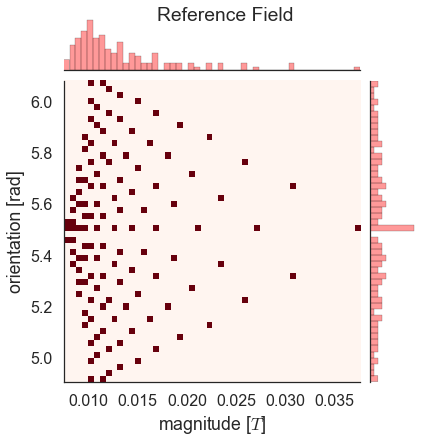

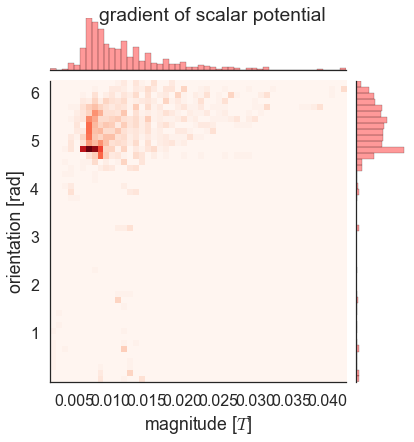

Xi^2 = 1191.40789910.2


In [89]:
xi2.calc_and_plot_dists([B_x, B_y, B_z], B_from_laplace_scalar_potential, 
                        units=r'$T$', field1_title=r'Reference Field', 
                        field2_title=r'gradient of scalar potential')

Reference std: 0.0143162549558
0.899131118805 0.0138457663279


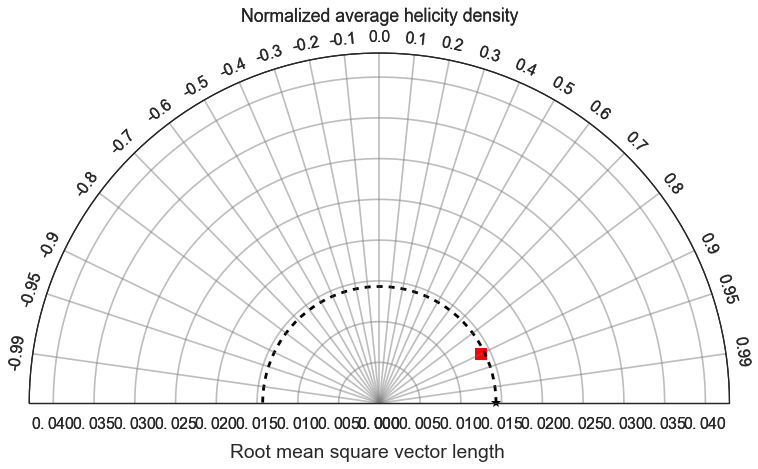

In [90]:
vt.calc_and_plot(np.asarray([B_x, B_y, B_z]),  
                 (np.asarray(B_from_laplace_scalar_potential),),
                 std_multiplier=3)

Reference std: 0.0150212089801
(3, 10, 10, 10)
(3, 10, 10, 10)
0.880531286657 0.0151952587804
(3, 10, 10, 10)
(3, 10, 10, 10)
0.955274881271 0.00821555339868
(3, 10, 10, 10)
(3, 10, 10, 10)
0.974443398113 0.00342407232234


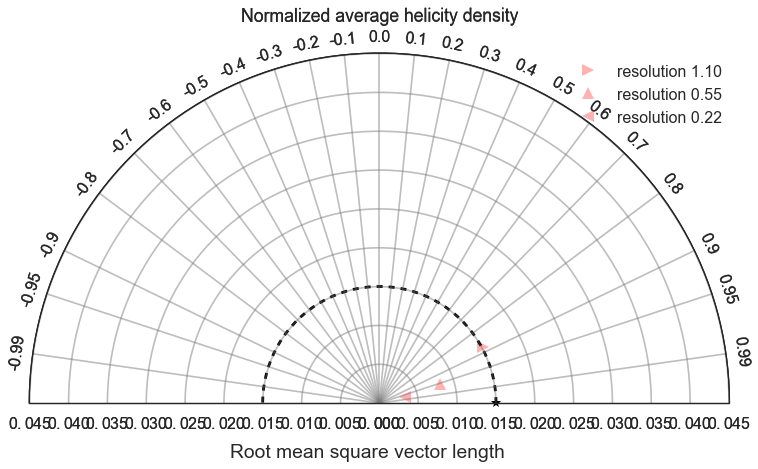

In [291]:
point_numbers = [10, 20, 50]
fields = []
labels = ['resolution %1.2f' % (11./point_numbers[0]), 
          'resolution %1.2f' % (11./point_numbers[1]), 
          'resolution %1.2f' % (11./point_numbers[2])]
for points_number in  point_numbers:
    mesh, A_x, A_y, A_z, B_x, B_y, B_z = vc.field_from_wire(limits=(3, 15, 3, 15, 3, 15),
                                                            wire_along_axis='y',
                                                            points=(points_number,
                                                                    points_number,
                                                                    points_number))
    boundary = np.zeros(mesh[0].shape)
    boundary[:, 0, :] = B_x[:, 0, :]
    boundary[:, -1, :] = B_x[:, -1, :]
    boundary[0, :, :] = B_y[0, :, :]
    boundary[-1, :, :] = B_y[-1, :, :]
    boundary[:, :, 0] = B_z[:, :, 0]
    boundary[:, :, 0] = B_z[:, :, 0]
    scalar_potential =  l_solve.laplace_3d_dct_fd(mesh, boundary)
    B_from_laplace_scalar_potential = vc.gradient(scalar_potential)
    fields.append(np.array(B_from_laplace_scalar_potential))
    
fields[1] = fields[1][:, ::2, ::2, ::2]
fields[2] = fields[2][:, ::5, ::5, ::5]
ref_field = np.asarray([B_x, B_y, B_z])[:, ::5, ::5, ::5]

vt.calc_and_plot(ref_field,  
                 fields,
                 labels=labels,
                 std_multiplier=3, markers=[">", "^", "<"])